# Exploratory Data Analysis (EDA)
## Credit Risk Modeling with Alternative Data (Xente Dataset)


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


# load the data set and sanity check

In [16]:
data_path = "../data/raw/data.csv"
df = pd.read_csv(data_path)
print(df.head())
df.info()


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

# Convert TransactionStartTime to datetime

In [17]:
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"])
df["TransactionStartTime"].head()

0   2018-11-15 02:18:49+00:00
1   2018-11-15 02:19:08+00:00
2   2018-11-15 02:44:21+00:00
3   2018-11-15 03:32:55+00:00
4   2018-11-15 03:34:21+00:00
Name: TransactionStartTime, dtype: datetime64[ns, UTC]

# Summary statistics (numerical)

In [18]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


# Transaction value distribution

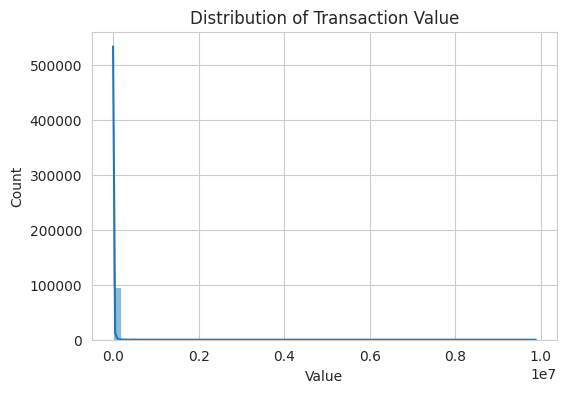

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df["Value"], bins=50, kde=True)
plt.title("Distribution of Transaction Value")
plt.show()


# Channel usage

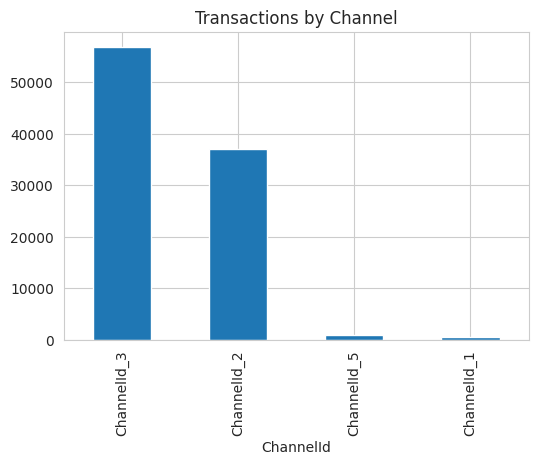

In [20]:
df["ChannelId"].value_counts()

plt.figure(figsize=(6,4))
df["ChannelId"].value_counts().plot(kind="bar")
plt.title("Transactions by Channel")
plt.show()
